In [1]:

#Assignment dataset: KNN_Project Dataset

In [2]:
#Dataset:KNN Dataset
#https://drive.google.com/file/d/1HIIGwwVs7QsFWciGHvbbM0qgYUI0A5Xl/view

## Import Libraries/Dataset

In [57]:
#Loading the Dataset
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline   
sns.set(color_codes=True)

data = pd.read_csv("KNN_Project")
print("Count of Rows and Columns: ", data.shape)

Count of Rows and Columns:  (1000, 11)


## 1.	Data Visualization, Exploration, Pre-processing and cleaning


#### 1.	Print 10 rows for sanity check to identify all the features present in the dataset

In [58]:
data.sample(10)
#Note:
#We can see that all Independent and dependednt features are present.

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
137,673.926758,1521.236689,503.737098,393.873664,1473.820732,2063.247944,1069.324602,599.585019,1211.707575,1538.549016,1
497,1193.534026,825.001621,1071.956766,737.626529,705.232569,1060.893586,1695.418701,483.971142,701.370820,1830.159336,0
502,1867.531226,1032.182024,1498.153910,578.698285,636.372158,560.504341,1080.287874,1061.810100,988.237407,1800.199232,0
894,729.036659,851.506093,1574.129617,274.849024,1283.597009,897.973232,1760.020301,294.151915,936.304638,2438.765925,0
966,1151.074348,1326.167453,982.614413,676.753038,467.596562,1266.154625,1641.418070,743.042879,565.693165,2110.574962,0
131,662.340744,158.124228,1054.179638,289.640966,896.387252,1489.080249,1816.244338,621.455348,993.615251,1412.279935,1
749,1724.333760,1272.276951,1713.322897,385.279792,398.474937,823.691236,1743.878756,496.840636,426.461566,1582.221967,0
403,1373.924920,834.403441,2396.829673,371.924968,507.651534,786.077794,649.548098,1271.159694,1113.267784,1303.723835,0
350,860.238987,327.359378,2293.657988,392.311873,1170.025375,1001.852687,685.572325,529.868175,1686.986299,1861.918610,1
607,1622.056299,692.372552,2641.412527,468.599973,1147.079187,1255.879209,2659.490889,624.517793,857.788828,1158.545801,1


In [59]:
#Exploring the data
data.info()

#Note:
#All features data types are correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [60]:
#Features definations:
data.columns

#Independent features
#XVPM
#GWYH
#TRAT
#TLLZ
#IGGA
#HYKR
#EDFS
#GUUB
#MGJM
#JHZC

#Dependent feature
#TARGET CLASS

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

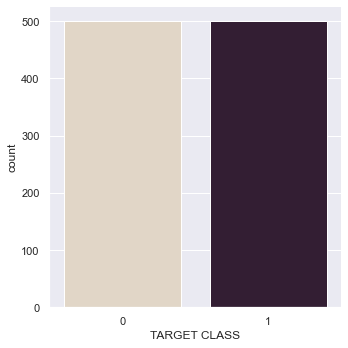

In [61]:
#Target feature:
sns.catplot(x="TARGET CLASS", kind="count", palette="ch:.25", data=data)

#Note:
# Targer feature is balanced, So no need of doing data sampling techniques for target feature.

#### Data Visualization (EDA)

In [62]:
# Features will be scaled to standardize the order of magnitude among all features
data.describe()

#Note:
#Population data with 5 number summary

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.078157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.841162,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1046.047215,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


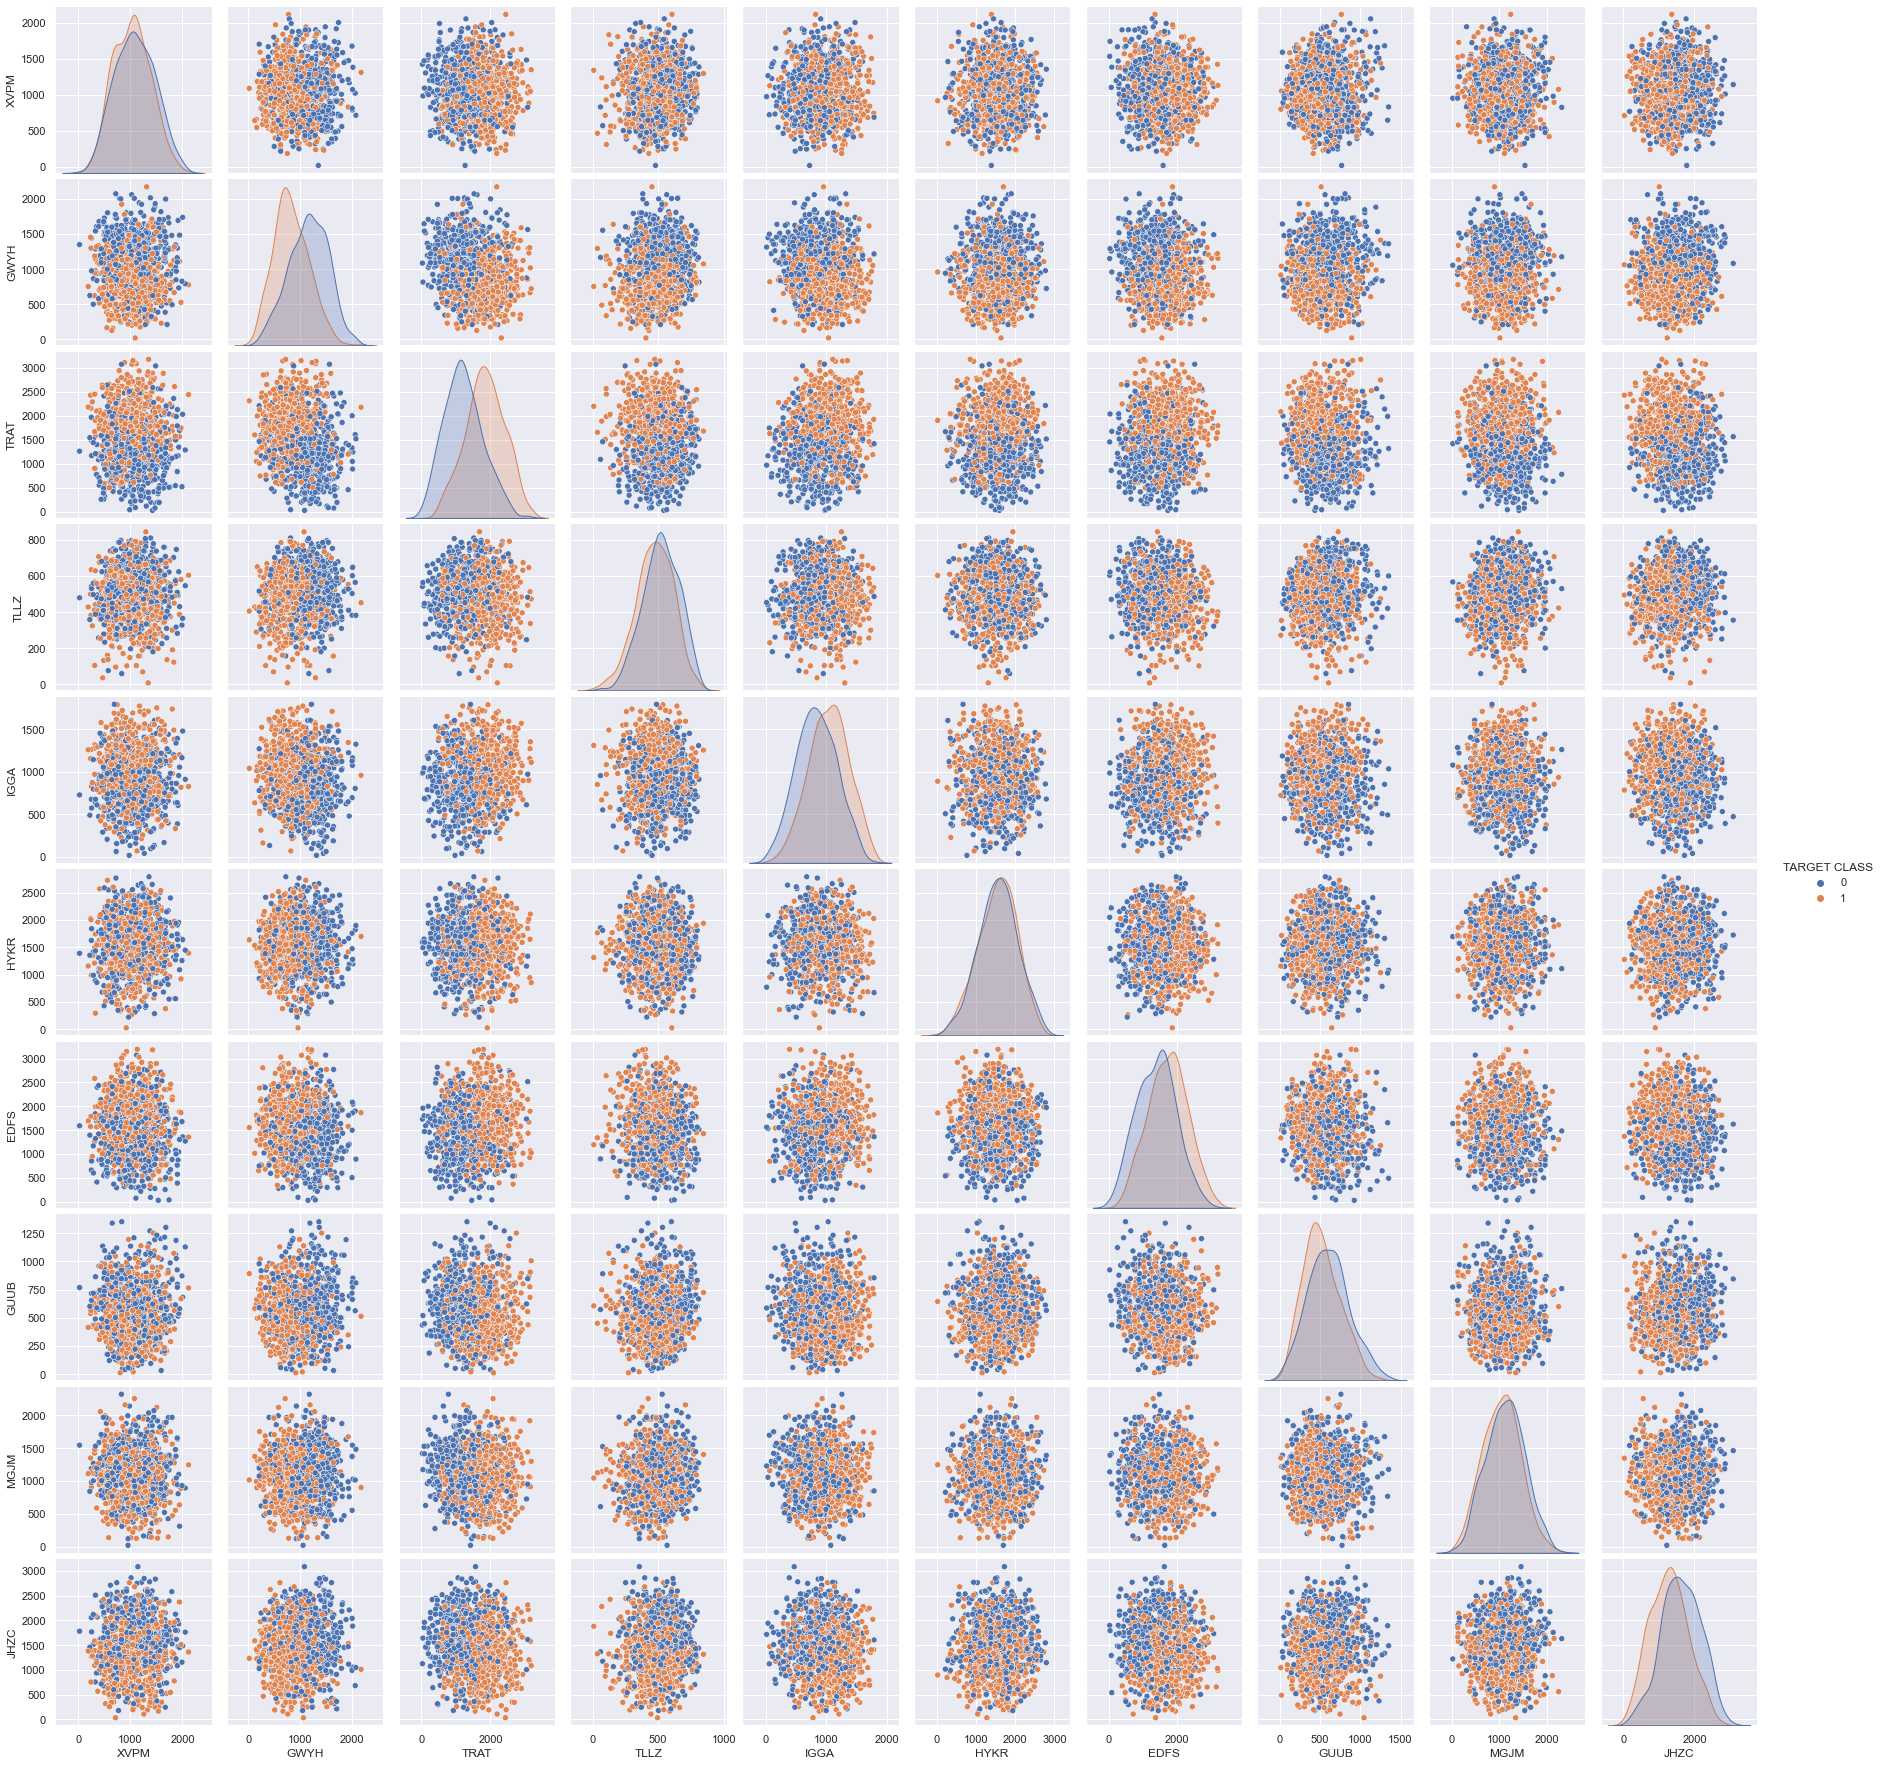

In [63]:
sns.pairplot(data=data,hue='TARGET CLASS')
#Note:
#All features are evenly distributed.

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,1.000000,-0.004978,-0.014188,0.055154,0.004170,0.002164,-0.024140,0.032280,-0.016295,0.026254,-0.079384
GWYH,-0.004978,1.000000,-0.224859,0.121623,-0.104795,0.042529,-0.102221,0.061553,0.039728,0.105532,-0.416168
TRAT,-0.014188,-0.224859,1.000000,-0.037726,0.124870,0.005462,0.118736,-0.073203,-0.067177,-0.119816,0.489347
TLLZ,0.055154,0.121623,-0.037726,1.000000,-0.005545,-0.004792,-0.063989,0.053958,0.094121,0.065143,-0.172029
IGGA,0.004170,-0.104795,0.124870,-0.005545,1.000000,0.003631,0.076304,-0.042134,-0.011688,-0.066895,0.295390
HYKR,0.002164,0.042529,0.005462,-0.004792,0.003631,1.000000,-0.007452,0.004891,0.025553,-0.006403,-0.015266
EDFS,-0.024140,-0.102221,0.118736,-0.063989,0.076304,-0.007452,1.000000,-0.071361,0.005865,-0.047928,0.281607
GUUB,0.032280,0.061553,-0.073203,0.053958,-0.042134,0.004891,-0.071361,1.000000,0.011507,0.061170,-0.174496
MGJM,-0.016295,0.039728,-0.067177,0.094121,-0.011688,0.025553,0.005865,0.011507,1.000000,0.014342,-0.098887
JHZC,0.026254,0.105532,-0.119816,0.065143,-0.066895,-0.006403,-0.047928,0.061170,0.014342,1.000000,-0.301725


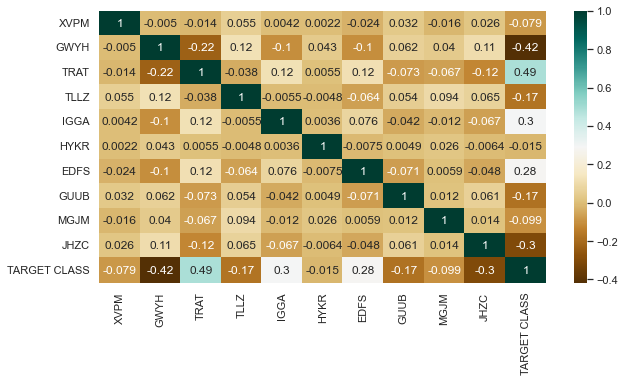

In [64]:
# Correlation between variables and dependent variable
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

#Note:
#We dont see any positive or negative Correlation b/w features.

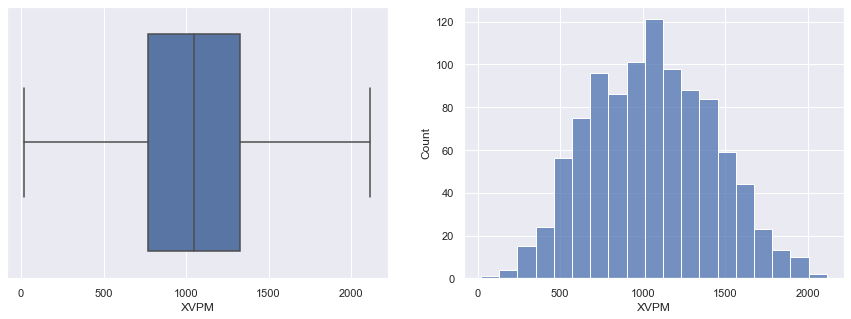

In [65]:
#XVPM  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='XVPM', ax=ax[0])

#Note
#Data is normally distributed

#XVPM  histogram
sns.histplot(data=data, x='XVPM', ax=ax[1])
plt.show()
#Note
#No outliers present

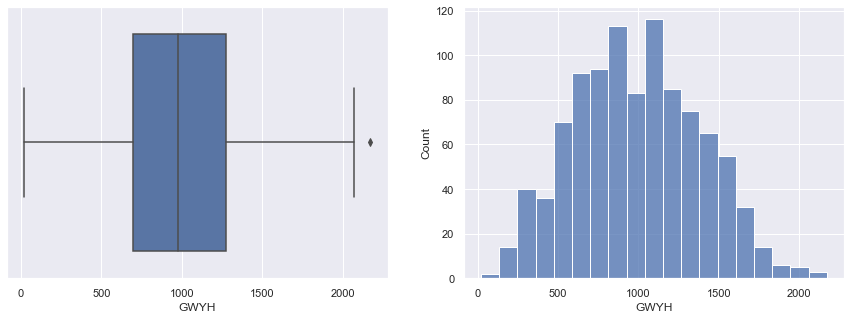

In [66]:
#GWYH  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='GWYH', ax=ax[0])

#Note
#Data is postively skewed

#GWYH  histogram
sns.histplot(data=data, x='GWYH', ax=ax[1])
plt.show()
#Note
#Only one upper tail outliers present

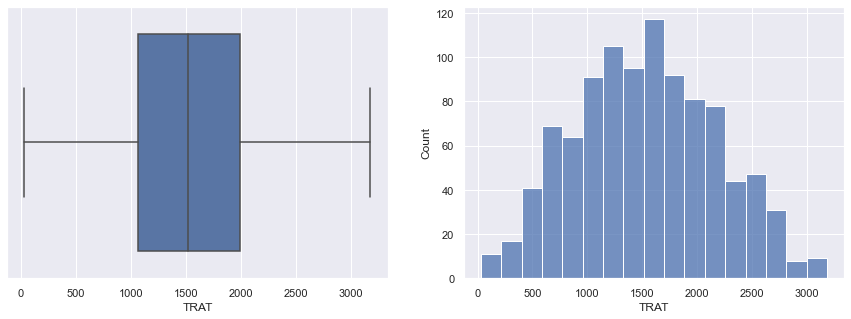

In [67]:
#TRAT  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='TRAT', ax=ax[0])

#Note
#Data is normally distributed

#TRAT  histogram
sns.histplot(data=data, x='TRAT', ax=ax[1])
plt.show()
#Note
#No outliers present

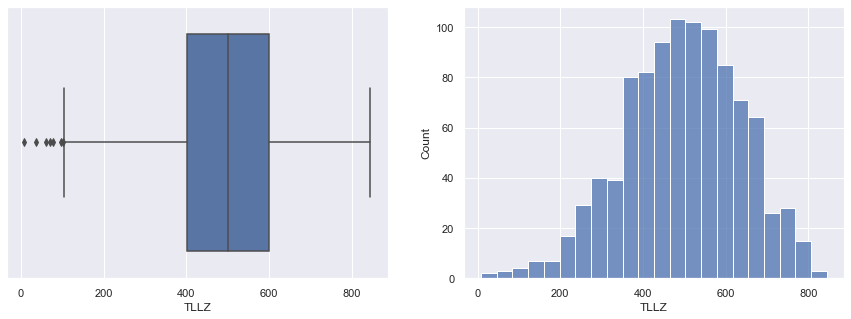

In [68]:
#TLLZ  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='TLLZ', ax=ax[0])

#Note
#Data is negatively skewed

#TLLZ  histogram
sns.histplot(data=data, x='TLLZ', ax=ax[1])
plt.show()
#Note
#Few lower tail outliers present

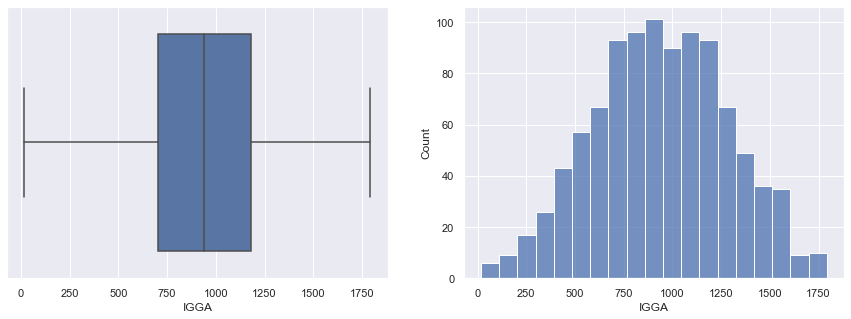

In [69]:
#IGGA  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='IGGA', ax=ax[0])

#Note
#Data is normally distributed

#IGGA  histogram
sns.histplot(data=data, x='IGGA', ax=ax[1])
plt.show()
#Note
#No outliers present

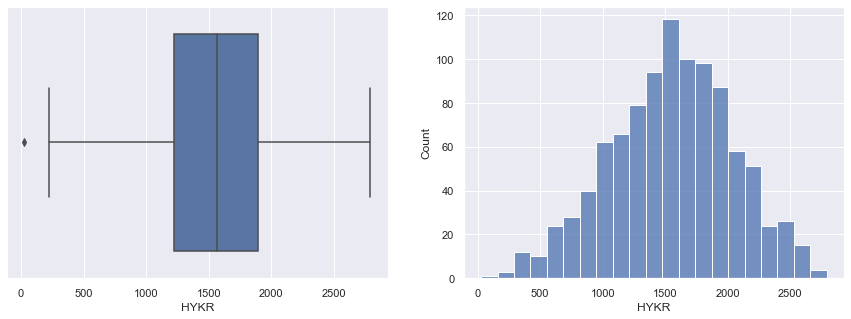

In [70]:
#HYKR  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='HYKR', ax=ax[0])

#Note
#Data is normally distributed

#HYKR  histogram
sns.histplot(data=data, x='HYKR', ax=ax[1])
plt.show()
#Note
#Only one lower tail outliers present

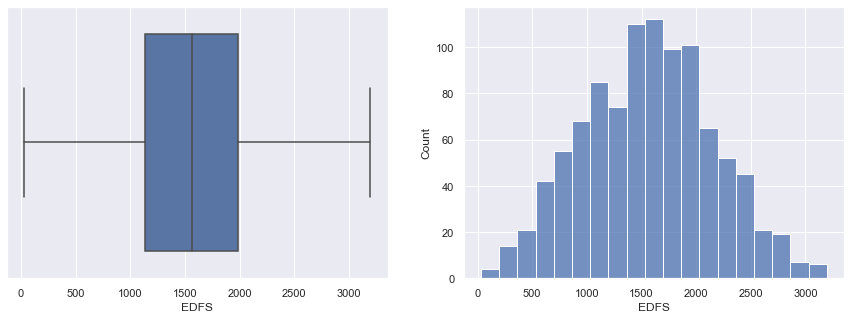

In [71]:
#EDFS  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='EDFS', ax=ax[0])

#Note
#Data is normally distributed

#EDFS  histogram
sns.histplot(data=data, x='EDFS', ax=ax[1])
plt.show()
#Note
#No outliers present

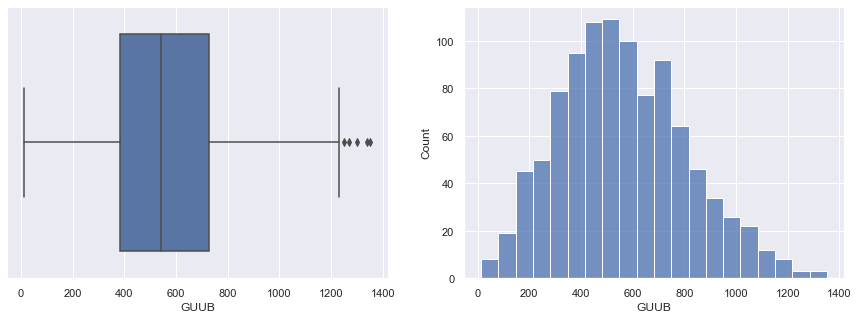

In [72]:
#GUUB  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='GUUB', ax=ax[0])

#Note
#Data is postively skewed

#GUUB  histogram
sns.histplot(data=data, x='GUUB', ax=ax[1])
plt.show()
#Note
#Few upper tail outliers present

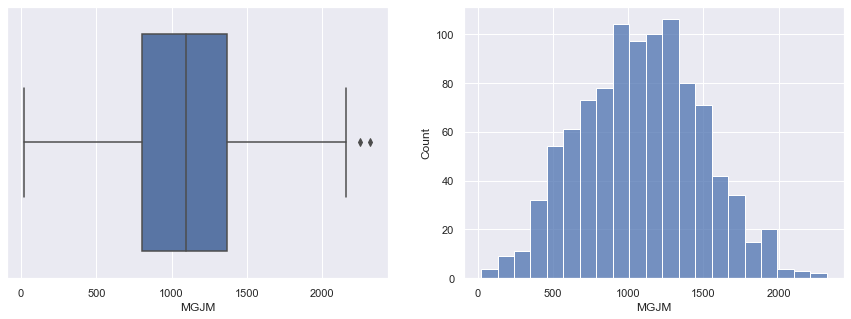

In [73]:
#MGJM  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='MGJM', ax=ax[0])

#Note
#Data is postively skewed

#MGJM  histogram
sns.histplot(data=data, x='MGJM', ax=ax[1])
plt.show()
#Note
#Few upper tail outliers present

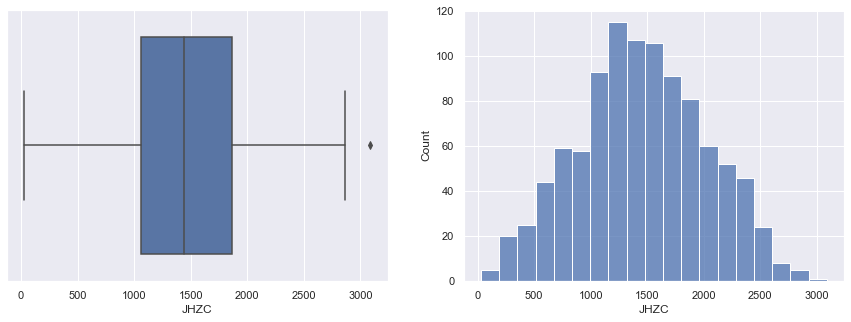

In [74]:
#JHZC  boxplot
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.boxplot(data=data, x='JHZC', ax=ax[0])

#Note
#Data is postively skewed

#JHZC  histogram
sns.histplot(data=data, x='JHZC', ax=ax[1])
plt.show()
#Note
#Only one upper tail outliers present

In [75]:
data.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

#### Data cleaning:

In [76]:
# Exploring NA and Treatment for missing values
data.isnull().sum()
#Note: 
#No NA/Missing Values in our dataset, So no need to Imputation/Treatment

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [77]:
#Treatment for outliers values: GWYH
Q1=data['GWYH'].quantile(0.25)
Q3=data['GWYH'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['GWYH'] = np.where((data['GWYH']>Upper_Whisker),data['GWYH'].quantile(0.90),
                             np.where((data['GWYH']<Lower_Whisker),data['GWYH'].quantile(0.10),data['GWYH']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [78]:
#Treatment for outliers values: TLLZ
Q1=data['TLLZ'].quantile(0.25)
Q3=data['TLLZ'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['TLLZ'] = np.where((data['TLLZ']>Upper_Whisker),data['TLLZ'].quantile(0.90),
                             np.where((data['TLLZ']<Lower_Whisker),data['TLLZ'].quantile(0.10),data['TLLZ']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [79]:
#Treatment for outliers values: HYKR
Q1=data['HYKR'].quantile(0.25)
Q3=data['HYKR'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['HYKR'] = np.where((data['HYKR']>Upper_Whisker),data['HYKR'].quantile(0.90),
                             np.where((data['HYKR']<Lower_Whisker),data['HYKR'].quantile(0.10),data['HYKR']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [80]:
#Treatment for outliers values: GUUB
Q1=data['GUUB'].quantile(0.25)
Q3=data['GUUB'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['GUUB'] = np.where((data['GUUB']>Upper_Whisker),data['GUUB'].quantile(0.90),
                             np.where((data['GUUB']<Lower_Whisker),data['GUUB'].quantile(0.10),data['GUUB']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [81]:
#Treatment for outliers values: MGJM
Q1=data['MGJM'].quantile(0.25)
Q3=data['MGJM'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['MGJM'] = np.where((data['MGJM']>Upper_Whisker),data['MGJM'].quantile(0.90),
                             np.where((data['MGJM']<Lower_Whisker),data['MGJM'].quantile(0.10),data['MGJM']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [82]:
#Treatment for outliers values: JHZC
Q1=data['JHZC'].quantile(0.25)
Q3=data['JHZC'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

data['JHZC'] = np.where((data['JHZC']>Upper_Whisker),data['JHZC'].quantile(0.90),
                             np.where((data['JHZC']<Lower_Whisker),data['JHZC'].quantile(0.10),data['JHZC']
                             ))

#Note
#Replacing outliers values with 90% quantile values for upper tail and 10% quantile values for lower tail outliers

In [83]:
#Collinearity Verification using Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_numeric = data._get_numeric_data()
X_numeric = add_constant(X_numeric)
VIF_frame = pd.Series([variance_inflation_factor(X_numeric.values, i) 
               for i in range(X_numeric.shape[1])], 
              index=X_numeric.columns).to_frame()

VIF_frame.drop('const', axis = 0, inplace = True) 
VIF_frame.rename(columns={VIF_frame.columns[0]: 'VIF'},inplace = True)
VIF_frame[~VIF_frame.isin([np.nan, np.inf, -np.inf]).any(1)]

#Note:
#No features VIF values are more than 10, so No multicollinearity is present.

,VIF
XVPM,1.012347
GWYH,1.225770
TRAT,1.325511
TLLZ,1.051357
IGGA,1.101284
HYKR,1.003270
EDFS,1.091504
GUUB,1.033068
MGJM,1.021287
JHZC,1.105125


#### 2.	Split the data as per 70:30 ratios of training and test set.

In [84]:
#Independednt and Dependednt features separation:
X = data.iloc[: , :-1]
y = data['TARGET CLASS']

<BarContainer object of 10 artists>

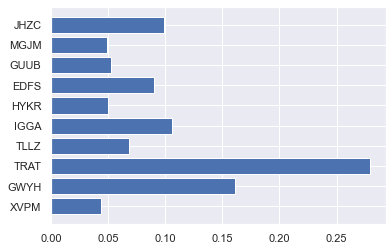

In [85]:
#feature importance
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)
rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)

#Note
#From RandomForestRegressor we can see that TRAT and GWYH are highly IMPORTANT features
#We have not transformed the independent data before passing to randomforest because its NOT parameteric algorithm, so transformation not needed.

In [86]:
#Train Test Split: 70% Train and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)
X_train.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
715,925.584670,1104.901064,1341.135247,645.997589,1518.654917,1237.974323,1317.825448,516.200307,1241.878301,2596.492534
240,1117.979504,1510.414907,991.760443,534.905702,937.559365,2121.985697,1977.628569,397.088542,1400.576170,370.938525
619,724.635949,1499.429086,1748.512626,412.635085,62.843103,1236.799714,1803.229017,511.343326,1697.927505,1122.070486
669,1021.478590,1659.778346,527.722556,543.588382,882.725567,1894.615026,1920.201935,430.381899,782.470592,1100.343427
973,1213.701723,1923.503348,463.006318,528.332521,646.820247,1110.083946,1181.804382,582.085677,988.787210,1470.102863


#### Pre-processing:

#### 3.	Normalize the dataset and print 10 rows.

In [87]:
#Standardize the Variables: on Train dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features = scaler.transform(X_train)
X_train = pd.DataFrame(scaled_features,columns=X_train.columns)
X_train.head(10)

#Note:
#KNN is a Parametric ML Model, So before passing on numerical feature with differnt scales. We need to normalize the feature
#So that KNN calculation via euclidean distance is faster. 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.334921,0.293748,-0.328333,1.050928,1.646162,-0.635738,-0.413479,-0.188697,0.352369,2.006308
1,0.183203,1.327471,-0.884913,0.253467,-0.031933,1.145577,0.719170,-0.672118,0.742685,-1.902519
2,-0.876080,1.299466,0.320650,-0.624239,-2.557948,-0.638104,0.419788,-0.208409,1.474018,-0.583277
3,-0.076676,1.708224,-1.624161,0.315795,-0.190282,0.687417,0.620589,-0.536995,-0.777540,-0.621437
4,0.440985,2.380504,-1.727259,0.206282,-0.871532,-0.893441,-0.646979,0.078702,-0.270106,0.027986
5,0.503077,0.391452,0.165085,0.359165,-1.996355,1.187280,1.853024,0.648700,1.168019,-0.176084
6,0.398710,0.869125,-0.874564,1.392930,-0.609927,-0.508734,-2.297010,0.745584,1.502690,0.464176
7,-1.538697,0.252978,-1.836258,-0.641021,0.306953,-0.355025,0.234374,0.160518,2.141467,0.345847
8,0.105408,0.350609,-0.002752,1.294595,0.492405,-2.491019,-0.030046,-0.886684,-0.406294,0.123847
9,-0.328876,-1.124831,-1.369898,0.920115,-0.248866,-0.044616,-0.022987,-0.489729,-0.112666,-1.208486


In [88]:
#Standardize the Variables: on Test dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
scaled_features2 = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_features2,columns=X_test.columns)
X_test.head(10)
#Note:
#KNN is a Parametric ML Model, So before passing on numerical feature with differnt scales. We need to normalize the feature
#So that KNN calculation via euclidean distance is faster. 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,0.606172,1.199273,0.353496,0.093629,-0.355705,1.680544,-0.146473,-0.580120,-0.195212,2.089366
1,0.949878,0.241288,-0.788006,0.041359,-0.104988,-1.084591,-1.594596,1.719300,-1.845724,0.985449
2,0.763619,-0.706024,2.541708,-0.125266,0.548547,-1.441708,-0.851538,1.945263,0.624801,-0.645938
3,1.346850,-0.291647,-0.003771,-0.891560,0.406407,0.452530,-1.321079,-0.835806,-1.713642,-1.013104
4,-0.720427,-1.883004,1.488602,-0.508598,-0.787586,0.871633,0.578580,0.533387,1.250529,0.224202
5,-1.801820,-0.753442,0.374230,-0.914701,0.851071,1.097758,-0.765848,-1.039468,-0.074990,-0.130849
6,-0.525792,-1.400840,1.523978,-0.125645,0.532271,-1.217857,1.382547,-0.533176,-0.115367,-0.052087
7,-0.936293,-1.272968,0.523573,-0.420798,1.127495,1.318203,1.243398,0.296717,1.683739,-0.333394
8,-0.676650,-0.192572,-0.810396,0.463656,1.899505,-0.649289,-0.460763,-1.365068,0.662000,-0.445519
9,1.440652,-0.490958,1.261480,-0.022298,1.949735,-0.492910,0.985346,-0.579236,0.029661,0.954736


## 2.	Model Building 

#### 1.	Define a function to return k- nearest neighbors

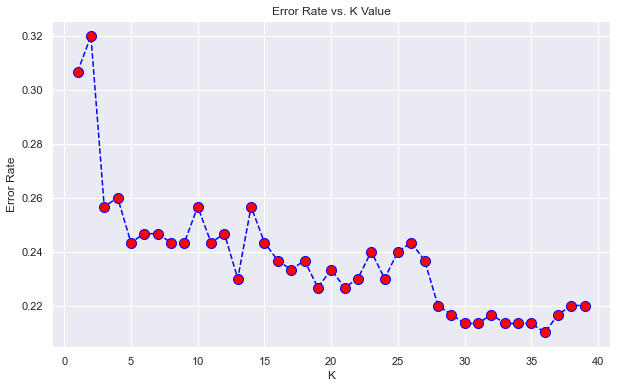

In [90]:
def k_value_function():
    error_rate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    

    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

    

#calling k_value_function function
k_value_function()

#Note:
#From below Error Rate and K value chart, We can see K with 30 has lowest Error Rate

#### 2.	Test the KNN Algorithm on the test dataset

In [105]:
#Model training
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=36)

In [106]:
#Predictions and Evaluations
pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,pred))

#Note:
#With K=36, KNN Model accuracy is 79%
#At K=36, The Error Rate is at lowest.

[[116  34]
 [ 30 120]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       150
           1       0.77      0.82      0.80       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



#### 3.	Repeat the procedure with different values of K and find the best value. 

In [112]:
#Retrain with new K Value 31
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

#Note:
#With K=31, KNN Model accuracy is 79%, same accuracy as above(with K=36)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       150
           1       0.77      0.82      0.79       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [108]:
#Retrain with new K Value 40
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

#Note:
#With K=40, KNN Model accuracy is 78%, which is reduced

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       150
           1       0.76      0.82      0.79       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [109]:
#Retrain with new K Value 25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

#Note:
#With K=25, KNN Model accuracy is 76%,which is reduced

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       150
           1       0.75      0.77      0.76       150

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



#### 4.	Justify how you will choose the best value

In [113]:
#Note:
#From above we can observe that K values lying from 30 to 36, Value is Accuracy is at highest that is 79%
#If we increase K value above 36 or reduce K value below 30, Accuracy decreases of the KNN Model.
#Therefore we can conclude that K=31 will give highest accuracy with lowest KNN compulation power compared with K=36.
#And having odd value of K for classification.